## Master's Thesis - Machine Learning in Asset Pricing

### Thomas Theodor Kjølbye 

The Following script handles all data used in the paper. On my computer, the entire script takes approximately 5 minutes to run. The data consist of individual firm characteristics as well as macroeconomic variables and are generously made available by Professors Gu, Kelly, Xiu, and Goyal. 

In [10]:
# Load the usual suspects
import pandas as pd
import numpy as np
import os
import RankTransformation as rt


%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [2]:
os.getcwd()

'C:\\Users\\thoma\\OneDrive - Københavns Universitet\\Documents\\Økonomi - Kandidat\\6. Semester\\Speciale\\Masters-Thesis'

In [3]:
# Load macroeconomic predictors 
macro_data_raw = pd.read_csv(os.path.dirname(os.getcwd()) + '\\PredictorData2021 - Monthly.csv')

# Because of the 1000-separator (,) index (price) is loaded as an object instead of a float. Check with df.dtypes
macro_data_raw["Index"].replace(',', '', inplace = True, regex = True)
macro_data_raw["Index"] = macro_data_raw["Index"].astype({"Index": float}) 

In [4]:
macro_data_raw

,yyyymm,Index,D12,E12,b/m,tbl,AAA,BAA,lty,ntis,Rfree,infl,ltr,corpr,svar,csp,CRSP_SPvw,CRSP_SPvwx
0,187101,4.44,0.2600,0.4000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,187102,4.50,0.2600,0.4000,NaN,NaN,NaN,NaN,NaN,NaN,0.004967,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,187103,4.61,0.2600,0.4000,NaN,NaN,NaN,NaN,NaN,NaN,0.004525,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,187104,4.74,0.2600,0.4000,NaN,NaN,NaN,NaN,NaN,NaN,0.004252,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,187105,4.86,0.2600,0.4000,NaN,NaN,NaN,NaN,NaN,NaN,0.004643,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1807,202108,4522.68,58.7913,169.8333,0.184756,0.0005,0.0255,0.0324,0.0128,0.014846,0.000000,0.002066,-0.0035,-0.0045,0.000602,NaN,0.030600,0.029205
1808,202109,4307.54,59.2545,175.3700,0.193036,0.0004,0.0253,0.0323,0.0137,0.015598,0.000000,0.002716,-0.0250,-0.0194,0.001393,NaN,-0.046076,-0.047152
1809,202110,4605.38,59.6354,182.8600,0.182389,0.0005,0.0268,0.0335,0.0158,0.013368,0.000000,0.008308,0.0051,0.0159,0.001151,NaN,0.070510,0.069627
1810,202111,4567.00,60.0162,190.3500,0.189455,0.0005,0.0262,0.0328,0.0156,0.015640,0.000100,0.004913,0.0210,0.0094,0.001327,NaN,-0.007256,-0.008665


In [5]:
# Initialize empty dataframe
column_names = ['yyyymm', 'd/p', 'e/p', 'b/m', 'ntis', 'tbl', 'tms', 'dfy', 'svar']
macro_data = pd.DataFrame(columns = column_names, index = range(macro_data_raw.shape[0]))

# Create macroeconomic predictors leveraged in Gu, Kelly, and Xiu (2020)
macro_data['yyyymm'] = macro_data_raw["yyyymm"]
macro_data['tbl'] = macro_data_raw["tbl"]
macro_data['svar'] = macro_data_raw["svar"]
macro_data['d/p'] = abs(np.log(macro_data_raw['D12']) - np.log(macro_data_raw['Index']))
macro_data['e/p'] = abs(np.log(macro_data_raw['E12']) - np.log(macro_data_raw['Index']))
macro_data['b/m'] = macro_data_raw["b/m"]
macro_data["ntis"] = macro_data_raw["ntis"]
macro_data["tms"] = macro_data_raw["lty"] - macro_data_raw["tbl"]
macro_data["dfy"] = macro_data_raw["BAA"] - macro_data_raw["AAA"]

# Export macro_data - Save outside of wd (repo)
macro_data.to_csv(os.path.dirname(os.getcwd()) + "\\macro_data.csv", index = False)

In [6]:
macro_data

,yyyymm,d/p,e/p,b/m,ntis,tbl,tms,dfy,svar
0,187101,2.837728,2.406945,NaN,NaN,NaN,NaN,NaN,NaN
1,187102,2.851151,2.420368,NaN,NaN,NaN,NaN,NaN,NaN
2,187103,2.875302,2.444519,NaN,NaN,NaN,NaN,NaN,NaN
3,187104,2.903111,2.472328,NaN,NaN,NaN,NaN,NaN,NaN
4,187105,2.928112,2.497329,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...
1807,202108,4.342866,3.282043,0.184756,0.014846,0.0005,0.0123,0.0069,0.000602
1808,202109,4.286281,3.201224,0.193036,0.015598,0.0004,0.0133,0.0070,0.001393
1809,202110,4.346731,3.226260,0.182389,0.013368,0.0005,0.0153,0.0067,0.001151
1810,202111,4.331997,3.177747,0.189455,0.015640,0.0005,0.0151,0.0066,0.001327


In [7]:
# Load firm characteristics
firm_data_raw = pd.read_csv(os.path.dirname(os.getcwd()) + '\\datashare.zip') 
firm_data_raw.columns = firm_data_raw.columns.str.lower()
print("The firm characteristics dataset is {:1.3f} GB".format(firm_data_raw.memory_usage().sum()/(1024 ** 3)))

# I have refrained from saving the firm char. in my wd (repo) because I am unable to push 3 GB worth of data to the github.

The firm characteristics dataset is 2.976 GB


In [10]:
firm_data_raw

,permno,date,mvel1,beta,betasq,chmom,dolvol,idiovol,indmom,mom1m,...,stdcf,ms,baspread,ill,maxret,retvol,std_dolvol,std_turn,zerotrade,sic2
0,10006,19570131,8.224900e+04,1.122846,1.260784,0.047180,9.569953,0.025742,0.046433,0.044843,...,NaN,NaN,0.013234,9.411565e-08,0.015453,0.008058,0.355638,0.460420,1.120996e-07,37.0
1,10014,19570131,3.903375e+03,0.426734,0.182102,-0.275641,6.237836,0.072103,0.046433,-0.086957,...,NaN,NaN,0.033305,6.610609e-06,0.047619,0.033495,1.152126,1.169610,9.229146e-08,NaN
2,10022,19570131,9.273250e+03,1.066449,1.137313,-0.025490,7.008844,0.027648,0.046433,-0.060377,...,NaN,NaN,0.016023,2.286832e-06,0.020833,0.015589,0.815777,0.679803,1.181757e-07,NaN
3,10030,19570131,5.446588e+04,0.926038,0.857547,0.018171,9.825337,0.021700,0.046433,0.044633,...,NaN,NaN,0.015295,1.464273e-07,0.039326,0.015849,0.739302,1.333656,6.126699e-08,NaN
4,10057,19570131,4.025000e+04,1.247748,1.556875,0.025785,7.901007,0.025506,0.046433,0.086667,...,NaN,NaN,0.005954,1.380375e-06,0.056856,0.019945,0.755510,0.410391,3.315790e+00,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4117295,93423,20211231,3.144398e+06,1.923076,3.698221,-0.673385,16.305232,0.062619,0.491455,-0.110868,...,0.960494,3.0,0.043829,3.698841e-10,0.073435,0.029678,0.399725,9.215947,5.031856e-09,79.0
4117296,93426,20211231,4.326610e+05,1.224523,1.499457,-0.061462,12.419552,0.033723,0.346308,0.007040,...,0.050973,6.0,0.025875,1.097624e-08,0.046055,0.019302,0.481331,1.649750,3.023395e-08,36.0
4117297,93427,20211231,4.092710e+06,0.887083,0.786917,-0.080295,14.884834,0.045395,0.346308,0.151667,...,0.052512,6.0,0.029966,8.593845e-10,0.131563,0.032861,0.440057,2.444487,2.224496e-08,36.0
4117298,93434,20211231,1.130478e+05,0.512942,0.263110,-0.543760,12.243872,0.088124,0.270005,-0.319347,...,0.556876,2.0,0.069943,1.145228e-07,0.036932,0.035858,0.968425,4.557546,3.155353e-08,1.0


 ### For my own convience I enclose a variable description from Gu, Kelly, and Xiu (2020). From the README: 

%%% This Version: April 2019. @copyright Shihao Gu, Bryan Kelly and Dacheng Xiu
%%% If you use the dataset, please cite the paper "Empirical Asset Pricing via Machine Learning" (2018) and "Autoencoder Asset Pricing Models." (2019)

Firm Characteristics Dataset Description: \
1.DATE: The end day of each month (YYYYMMDD) \
2.permno: CRSP Permanent Company Number \
3-96. 94 Lagged Firm Characteristics (Details are in the appendix of our paper) \
97.sic2: The first two digits of the Standard Industrial Classification code on DATE

Most of these characteristics are released to the public with a delay. To avoid the forward-looking bias, we assume that monthly characteristics are delayed by at most 1 month, quarterly with at least 4 months lag, and annual with at least 6 months lag. Therefore, in order to predict returns at month t + 1, we use most recent monthly characteristics at the end of month t, most recent quarterly data by end t − 4, and most recent annual data by end t − 6. In this dataset, we've already adjusted the lags. (e.g. When DATE=19570329 in our dataset, you can use the monthly RET at 195703 as the response variable.) 

Note: CRSP returns are not included. They are accessible from WRDS.

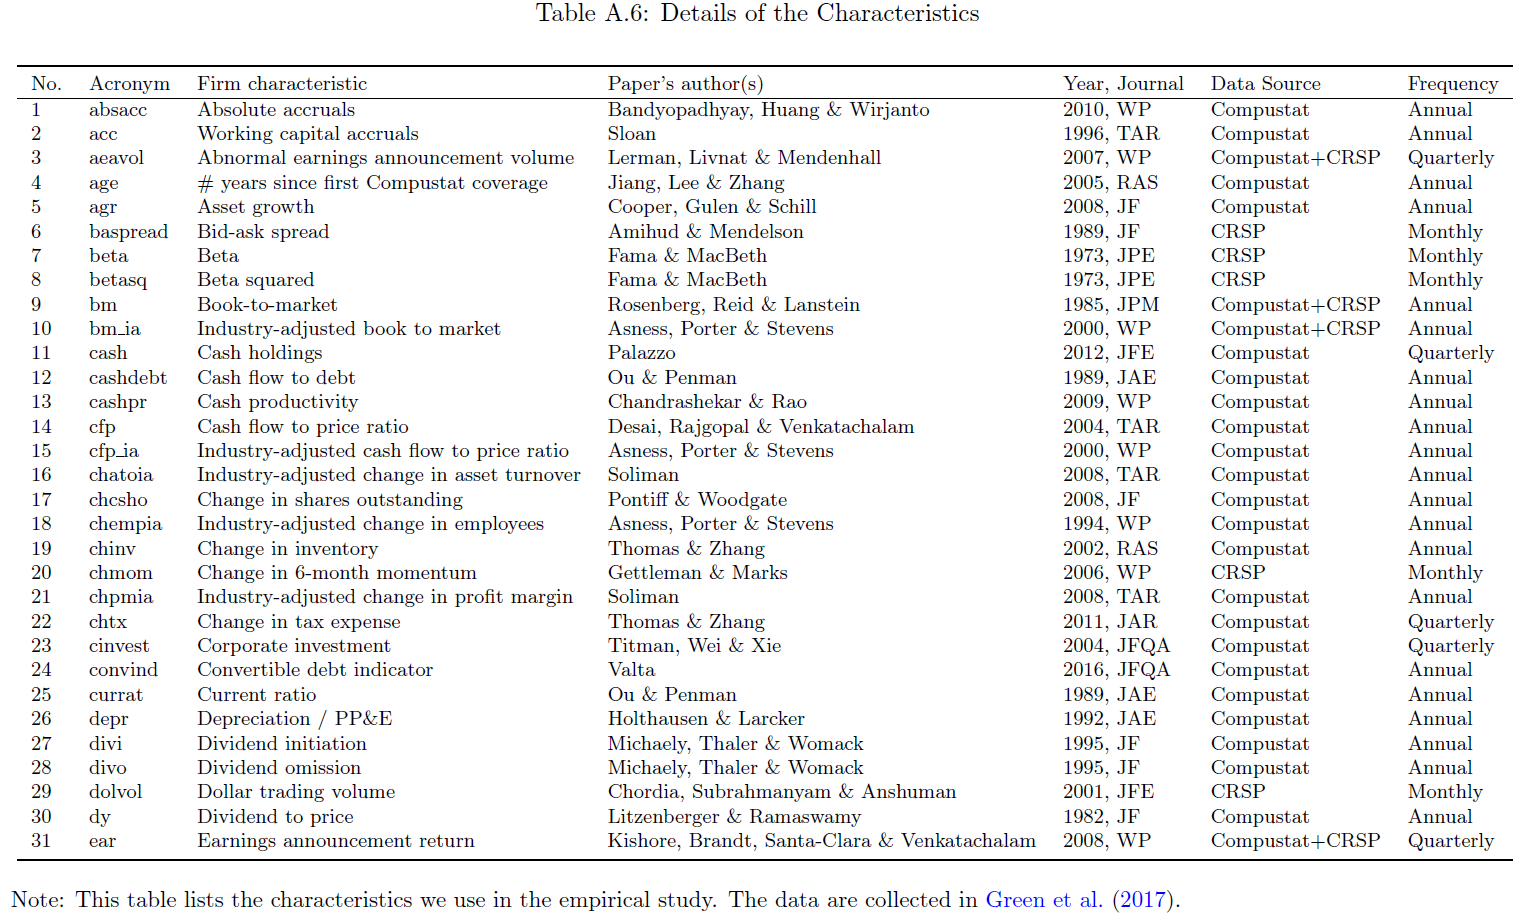

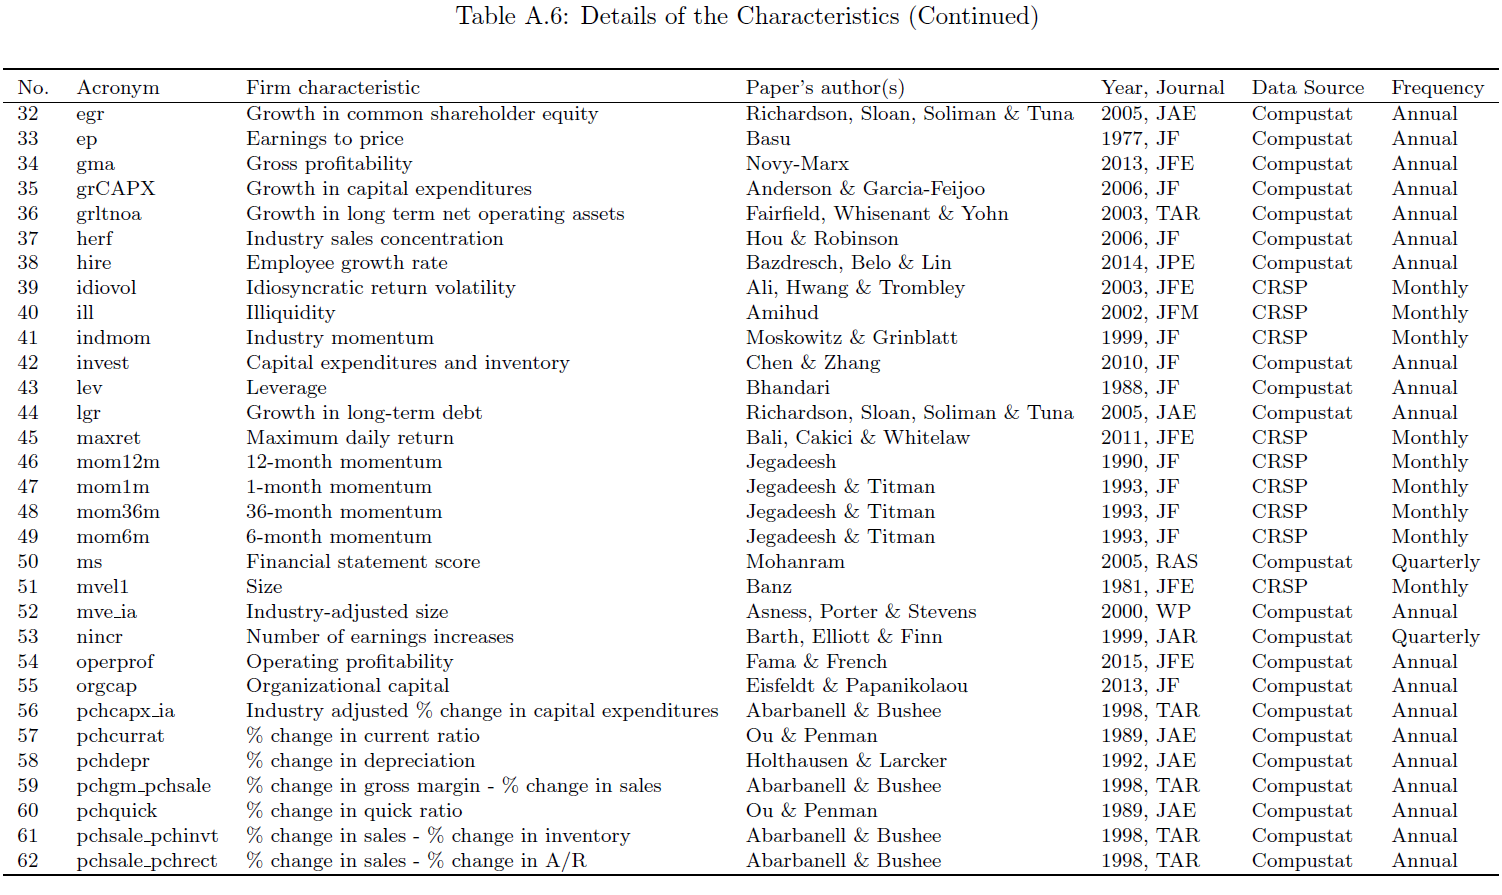

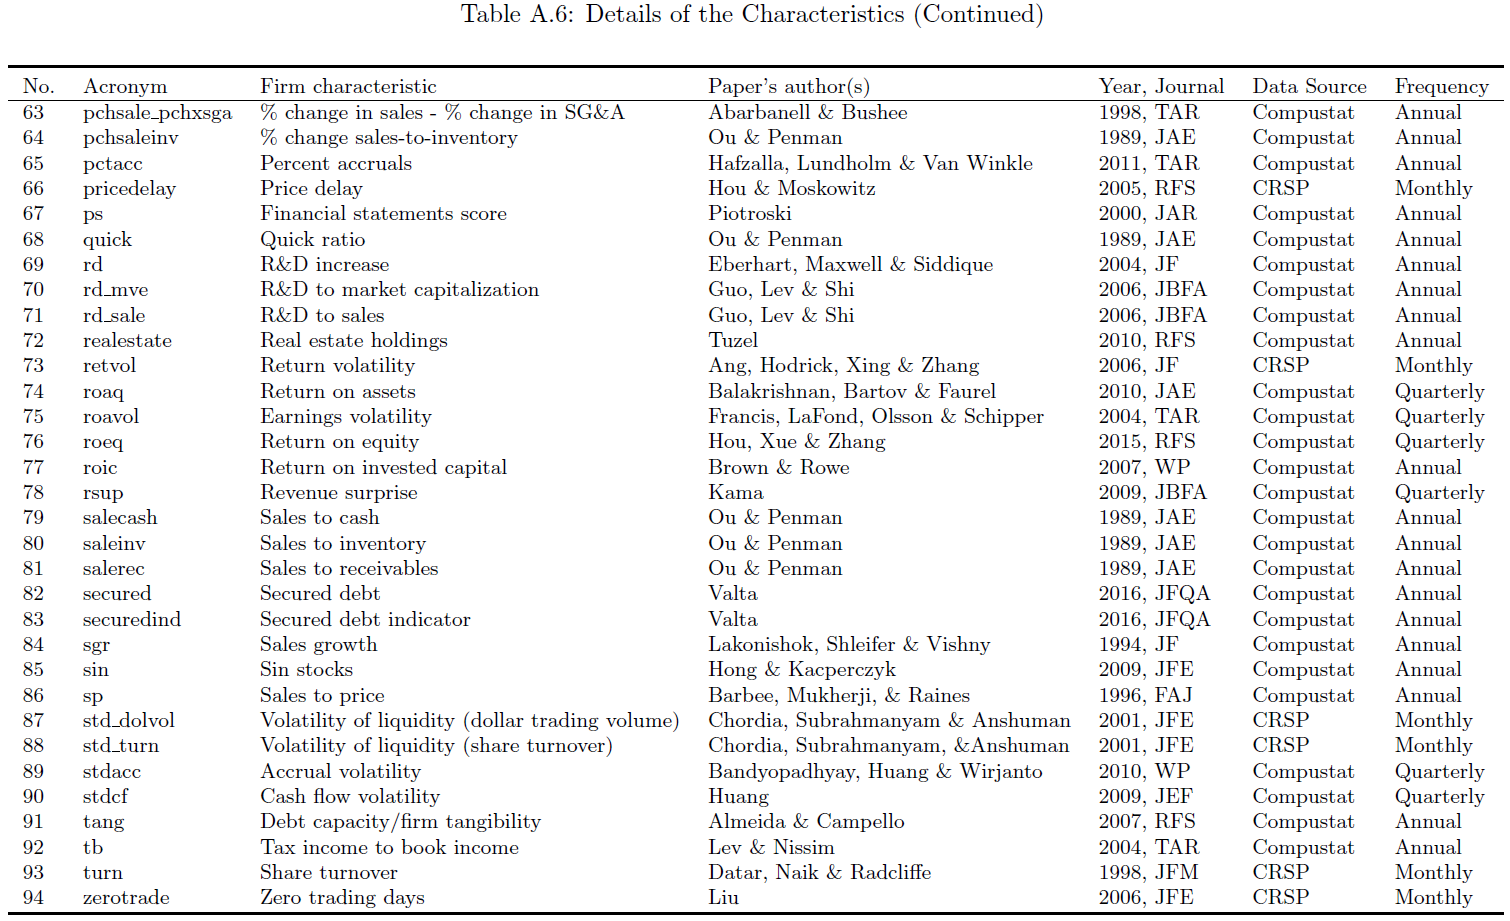

In [11]:
# 1 of 2: Rank transformation of firm specific characteristics
firm_chars = firm_data_raw.loc[:, "date":"zerotrade"].groupby("date").rank(method = "first")
firm_data = pd.concat([firm_data_raw[["permno", "date"]], firm_chars], axis = 1)

'''
Note: The rank() method does not give rank to NaN observations. Consequently, if there are missing values
(which there are) the highest rank of a characteristic will be less than N, the number of firms. Moreover,
if two values are identical rank() will return ranks x and x+1, respectively. 

'''

'\nNote: The rank() method does not give rank to NaN observations. If two values are identical they adjecent ranks \n\n'

In [ ]:
# Delete raw data set to clear memory 
del firm_data_raw

In [ ]:
# Diagnostics: The highest rank of all characteristics at all times is equal to the number of observations at the same point in time
for i in firm_data["date"].unique():
    
    no_char =  no_char = firm_data.shape[1] - 2 # number of characteristics. Subtract permno and date 
    N = firm_data[firm_data["date"] == i].shape[0] * np.ones(no_char) # number of firms (observations) at given date
    max_rank = firm_data[firm_data["date"] == i].iloc[:, 2:].max().fillna(0) # max rank, i.e. number o non-NaN observations
    no_NaN = np.asarray(firm_data[firm_data["date"] == i].iloc[:, 2:].isna().sum()) # number of NaN obs. for each char at given date
    
    if np.any(max_rank != N - no_NaN):
        print("Error: The highest rank is different from the number of firms, N")
    #else:
    #    print("No Error")

In [ ]:
# 2 of 2: Normalization of firm specific characteristics according to equation (A.1) in Gu, Kelly, and Xiu (2020)